In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

dataoriginal = pd.read_csv("states_al4l.csv")
dataoriginal

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,247.0,287.0,224.0,262.0
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,240.0,286.0,220.0,266.0
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,231.0,272.0,213.0,256.0
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,242.0,289.0,220.0,267.0


In [3]:
dataoriginal.isnull().sum()

PRIMARY_KEY                        0
STATE                              0
YEAR                               0
ENROLL                           491
TOTAL_REVENUE                    440
FEDERAL_REVENUE                  440
STATE_REVENUE                    440
LOCAL_REVENUE                    440
TOTAL_EXPENDITURE                440
INSTRUCTION_EXPENDITURE          440
SUPPORT_SERVICES_EXPENDITURE     440
OTHER_EXPENDITURE                491
CAPITAL_OUTLAY_EXPENDITURE       440
GRADES_PK_G                      173
GRADES_KG_G                       83
GRADES_4_G                        83
GRADES_8_G                        83
GRADES_12_G                       83
GRADES_1_8_G                     695
GRADES_9_12_G                    644
GRADES_ALL_G                      83
AVG_MATH_4_SCORE                1150
AVG_MATH_8_SCORE                1113
AVG_READING_4_SCORE             1065
AVG_READING_8_SCORE             1153
dtype: int64

Derived the descriptive statistics of the data and discussed the points i found remarkable.

In [4]:
dataoriginal.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1715.000000,1.224000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.224000e+03,...,1632.000000,1632.000000,1632.000000,1.020000e+03,1.071000e+03,1.632000e+03,565.000000,602.000000,650.000000,562.000000
mean,2002.075219,9.175416e+05,9.102045e+06,7.677799e+05,4.223743e+06,4.110522e+06,9.206242e+06,4.768010e+06,2.682587e+06,4.299509e+05,...,69166.507966,68106.537377,58420.870711,5.779547e+05,2.820691e+05,9.139695e+05,236.327434,278.280731,218.806154,263.558719
std,9.568621,1.066514e+06,1.175962e+07,1.146992e+06,5.549735e+06,5.489562e+06,1.199279e+07,6.300569e+06,3.357214e+06,5.347893e+05,...,79957.990356,77965.847263,67438.530709,6.757837e+05,3.307098e+05,1.055893e+06,9.285505,10.343482,7.681805,6.612601
min,1986.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,...,4577.000000,3371.000000,2572.000000,3.769800e+04,1.353000e+04,6.844900e+04,192.000000,231.000000,179.000000,236.000000
25%,1994.000000,2.645145e+05,2.189504e+06,1.899575e+05,1.165776e+06,7.151210e+05,2.170404e+06,1.171336e+06,6.380760e+05,1.034492e+05,...,18971.500000,19594.250000,16076.500000,1.649250e+05,8.060800e+04,2.480832e+05,232.000000,272.000000,215.000000,260.000000
50%,2002.000000,6.499335e+05,5.085826e+06,4.035480e+05,2.537754e+06,2.058996e+06,5.242672e+06,2.658253e+06,1.525471e+06,2.717040e+05,...,49087.000000,47880.000000,39408.000000,4.051115e+05,1.869190e+05,6.458050e+05,238.000000,280.500000,220.000000,265.000000
75%,2010.000000,1.010532e+06,1.084516e+07,8.279320e+05,5.055548e+06,4.755293e+06,1.074420e+07,5.561959e+06,3.222924e+06,5.172222e+05,...,78504.250000,78976.000000,69397.250000,6.439752e+05,3.223280e+05,1.043420e+06,242.000000,286.000000,224.000000,268.000000
max,2019.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.000000,500143.000000,498403.000000,3.929869e+06,2.013687e+06,6.441557e+06,253.000000,301.000000,237.000000,280.000000


In [5]:
dataoriginal.describe(include= 'all')

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1715,1715,1715.000000,1.224000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,1.275000e+03,...,1632.000000,1632.000000,1632.000000,1.020000e+03,1.071000e+03,1.632000e+03,565.000000,602.000000,650.000000,562.000000
unique,1715,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1998_NORTH_CAROLINA,INDIANA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2002.075219,9.175416e+05,9.102045e+06,7.677799e+05,4.223743e+06,4.110522e+06,9.206242e+06,4.768010e+06,...,69166.507966,68106.537377,58420.870711,5.779547e+05,2.820691e+05,9.139695e+05,236.327434,278.280731,218.806154,263.558719
std,NaN,NaN,9.568621,1.066514e+06,1.175962e+07,1.146992e+06,5.549735e+06,5.489562e+06,1.199279e+07,6.300569e+06,...,79957.990356,77965.847263,67438.530709,6.757837e+05,3.307098e+05,1.055893e+06,9.285505,10.343482,7.681805,6.612601
min,NaN,NaN,1986.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,...,4577.000000,3371.000000,2572.000000,3.769800e+04,1.353000e+04,6.844900e+04,192.000000,231.000000,179.000000,236.000000
25%,NaN,NaN,1994.000000,2.645145e+05,2.189504e+06,1.899575e+05,1.165776e+06,7.151210e+05,2.170404e+06,1.171336e+06,...,18971.500000,19594.250000,16076.500000,1.649250e+05,8.060800e+04,2.480832e+05,232.000000,272.000000,215.000000,260.000000
50%,NaN,NaN,2002.000000,6.499335e+05,5.085826e+06,4.035480e+05,2.537754e+06,2.058996e+06,5.242672e+06,2.658253e+06,...,49087.000000,47880.000000,39408.000000,4.051115e+05,1.869190e+05,6.458050e+05,238.000000,280.500000,220.000000,265.000000
75%,NaN,NaN,2010.000000,1.010532e+06,1.084516e+07,8.279320e+05,5.055548e+06,4.755293e+06,1.074420e+07,5.561959e+06,...,78504.250000,78976.000000,69397.250000,6.439752e+05,3.223280e+05,1.043420e+06,242.000000,286.000000,224.000000,268.000000


In [6]:
#Derive the descriptive statistics of the data and discuss the points you find remarkable.
print("It is determined that there are two categorical data columns [PRIMARY_KEY and STATE] and the \n rest of the columns are numeric.")
print("It is also noticed that the standard deviation of many variables, such as:'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',\n 'AVG_READING_4_SCORE', and 'AVG_READING_8_SCORE'are much wider and not nearer to the mean as compared to that of the other variables, 'TOTAL_REVENUE' and 'TOTAL_EXPENDITURE'.")

It is determined that there are two categorical data columns [PRIMARY_KEY and STATE] and the 
 rest of the columns are numeric.
It is also noticed that the standard deviation of many variables, such as:'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
 'AVG_READING_4_SCORE', and 'AVG_READING_8_SCORE'are much wider and not nearer to the mean as compared to that of the other variables, 'TOTAL_REVENUE' and 'TOTAL_EXPENDITURE'.


In [7]:
dataoriginal.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

In [8]:
arr =dataoriginal.YEAR.value_counts()
for key, value in arr.items():
    print(key, value)

2002 53
1998 53
2017 53
2015 53
2013 53
2011 53
2009 53
2007 53
2005 53
2003 53
2000 53
2019 53
1996 53
1994 53
1990 53
1992 53
1997 51
2010 51
1988 51
2016 51
1989 51
2014 51
2012 51
1991 51
2008 51
1999 51
1993 51
2006 51
2004 51
1995 51
1987 51
2001 51
1986 51


# Trends of Revenue and Expenditure in NEW YORK

Text(0.5, 1.0, 'TOTAL_EXPENDITURE_imputed')

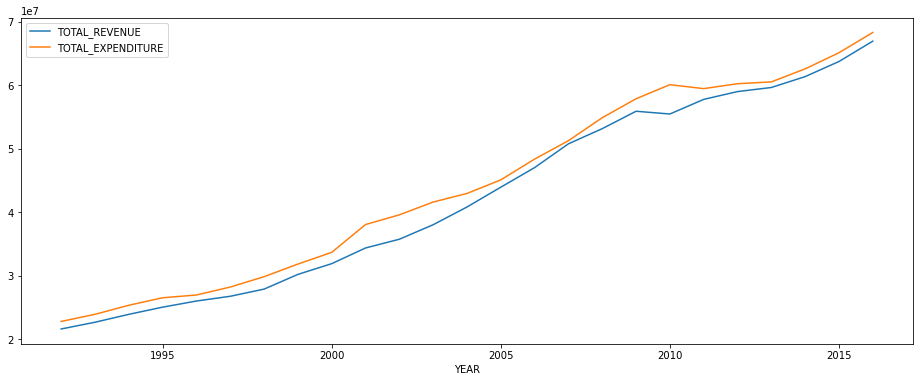

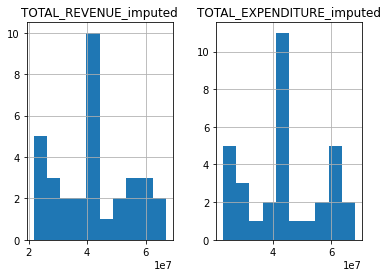

In [9]:
Revenue_Expenditure_State = dataoriginal[[ 'STATE', 'YEAR', 'TOTAL_REVENUE','TOTAL_EXPENDITURE','AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE','AVG_READING_4_SCORE', 'AVG_READING_8_SCORE']]
NEWYORK_R_E = Revenue_Expenditure_State[Revenue_Expenditure_State['STATE']=='NEW_YORK']
NEWYORK_R_E.set_index('STATE', inplace=True)
NEWYORK_R_E


data2= NEWYORK_R_E
data2["TOTAL_REVENUE_imputed"]=data2["TOTAL_REVENUE"].fillna(data2["TOTAL_REVENUE"].mean())
data2["TOTAL_EXPENDITURE_imputed"]=data2["TOTAL_EXPENDITURE"].fillna(data2["TOTAL_EXPENDITURE"].mean())
data2.isnull().sum()



data2 =  data2[['TOTAL_REVENUE_imputed', 'TOTAL_EXPENDITURE_imputed']].to_numpy()
data2

data2 = pd.DataFrame(data2, columns=['TOTAL_REVENUE_imputed', 'TOTAL_EXPENDITURE_imputed'])

NEWYORK_R_E1= NEWYORK_R_E
xn = NEWYORK_R_E1.drop(['AVG_MATH_4_SCORE',
       'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE',
       'TOTAL_REVENUE_imputed', 'TOTAL_EXPENDITURE_imputed'], axis=1)
xn.set_index('YEAR', inplace=True)

lines = xn.plot.line(figsize=(16,6))

data2[['TOTAL_REVENUE_imputed', 'TOTAL_EXPENDITURE_imputed']].hist()
plt.title('TOTAL_REVENUE_imputed for NEW YORK')
plt.title('TOTAL_EXPENDITURE_imputed')

# Trends of Revenue and Expenditure in WASHINGTON DC

Text(0.5, 1.0, 'TOTAL_EXPENDITURE_imputed')

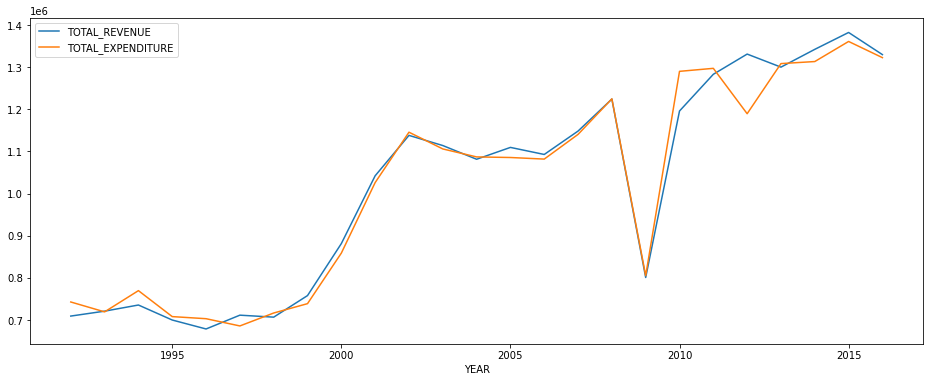

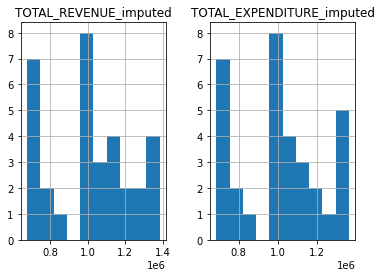

In [10]:
DISTRICT_OF_COLUMBIA_R_E = Revenue_Expenditure_State[Revenue_Expenditure_State['STATE']=='DISTRICT_OF_COLUMBIA']
DISTRICT_OF_COLUMBIA_R_E.set_index('STATE', inplace=True)
DISTRICT_OF_COLUMBIA_R_E

data2= DISTRICT_OF_COLUMBIA_R_E
data2["TOTAL_REVENUE_imputed"]=data2["TOTAL_REVENUE"].fillna(data2["TOTAL_REVENUE"].mean())
data2["TOTAL_EXPENDITURE_imputed"]=data2["TOTAL_EXPENDITURE"].fillna(data2["TOTAL_EXPENDITURE"].mean())
data2.isnull().sum()



data2 =  data2[['TOTAL_REVENUE_imputed', 'TOTAL_EXPENDITURE_imputed']].to_numpy()
data2

data2 = pd.DataFrame(data2, columns=['TOTAL_REVENUE_imputed', 'TOTAL_EXPENDITURE_imputed'])

DISTRICT_OF_COLUMBIA_R_E1= DISTRICT_OF_COLUMBIA_R_E
xd = DISTRICT_OF_COLUMBIA_R_E1.drop(['AVG_MATH_4_SCORE',
       'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE',
       'TOTAL_REVENUE_imputed', 'TOTAL_EXPENDITURE_imputed'], axis=1)
xd.set_index('YEAR', inplace=True)

lines = xd.plot.line(figsize=(16,6))

data2[['TOTAL_REVENUE_imputed', 'TOTAL_EXPENDITURE_imputed']].hist()
plt.title('TOTAL_REVENUE_imputed for Washington DC')
plt.title('TOTAL_EXPENDITURE_imputed')

# Trends of Revenue and Expenditure in VIRGINIA 

Text(0.5, 1.0, 'TOTAL_EXPENDITURE_imputed')

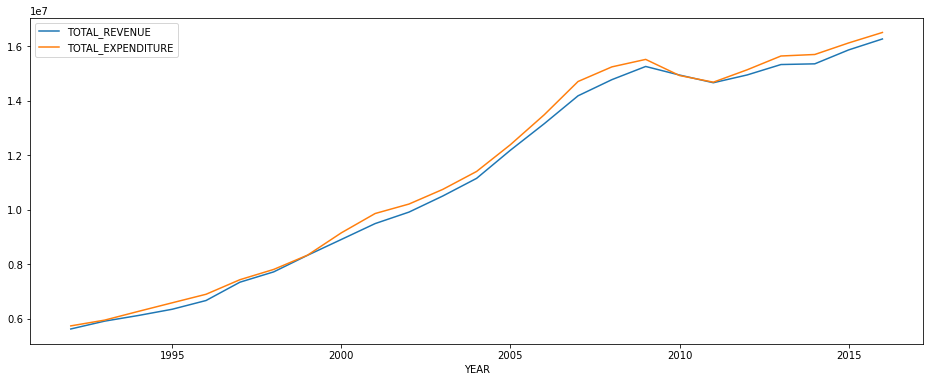

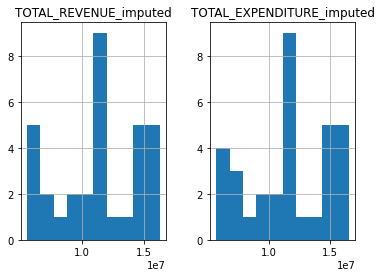

In [11]:
VIRGINIA_R_E = Revenue_Expenditure_State[Revenue_Expenditure_State['STATE']=='VIRGINIA']
VIRGINIA_R_E.set_index('STATE', inplace=True)
VIRGINIA_R_E

data2= VIRGINIA_R_E
data2["TOTAL_REVENUE_imputed"]=data2["TOTAL_REVENUE"].fillna(data2["TOTAL_REVENUE"].mean())
data2["TOTAL_EXPENDITURE_imputed"]=data2["TOTAL_EXPENDITURE"].fillna(data2["TOTAL_EXPENDITURE"].mean())
data2.isnull().sum()



data2 =  data2[['TOTAL_REVENUE_imputed', 'TOTAL_EXPENDITURE_imputed']].to_numpy()
data2

data2 = pd.DataFrame(data2, columns=['TOTAL_REVENUE_imputed', 'TOTAL_EXPENDITURE_imputed'])


VIRGINIA_R_E1= VIRGINIA_R_E.copy()
x = VIRGINIA_R_E1.drop(['AVG_MATH_4_SCORE',
       'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE',
       'TOTAL_REVENUE_imputed', 'TOTAL_EXPENDITURE_imputed'], axis=1)
x.set_index('YEAR', inplace=True)

lines = x.plot.line(figsize=(16,6))


data2[['TOTAL_REVENUE_imputed', 'TOTAL_EXPENDITURE_imputed']].hist()
plt.title('TOTAL_REVENUE_imputed')
plt.title('TOTAL_EXPENDITURE_imputed')

Text(0.5, 1.0, 'TOTAL_EXPENDITURE for VIRGINIA')

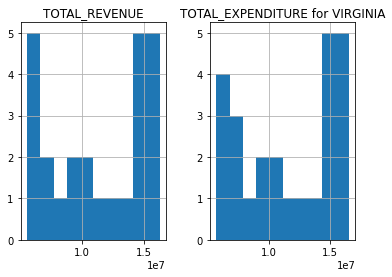

In [12]:
# This is the histogram that shows distribution of data of the original data for the state, VIRGINIA 
# before fixing NaN and outliers 
data =  VIRGINIA_R_E[['TOTAL_REVENUE', 'TOTAL_EXPENDITURE']].to_numpy()
data

data1 = pd.DataFrame(data, columns=['TOTAL_REVENUE', 'TOTAL_EXPENDITURE'])

VIRGINIA_R_E[['TOTAL_REVENUE', 'TOTAL_EXPENDITURE']].hist()
plt.title('TOTAL_REVENUE for VIRGINIA')
plt.title('TOTAL_EXPENDITURE for VIRGINIA')

# https://stackoverflow.com/questions/31789160/convert-select-columns-in-pandas-dataframe-to-numpy-array

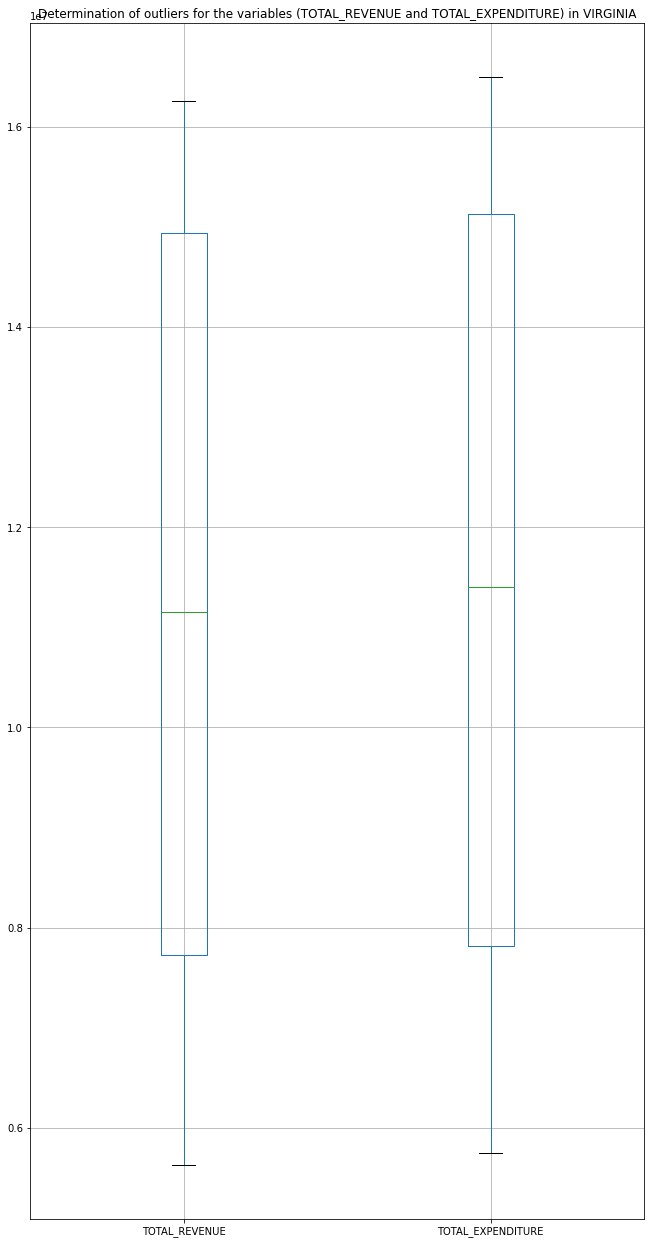

In [13]:
# This is the boxplot that shows distribution of data of the original data for the state, VIRGINIA 
# before fixing NaN and outliers 
data1.boxplot(column=['TOTAL_REVENUE', 'TOTAL_EXPENDITURE'], figsize=(11,22))
title_boxplot = 'Determination of outliers for the variables (TOTAL_REVENUE and TOTAL_EXPENDITURE) in VIRGINIA'
plt.title( title_boxplot )
plt.suptitle('') # that's what you're after
plt.show()

# https://stackoverflow.com/questions/23507229/set-no-title-for-pandas-boxplot-groupby

# The following is done to see the effects on histogram and boxplot of the data after the imputation of the variables with mean for missing values

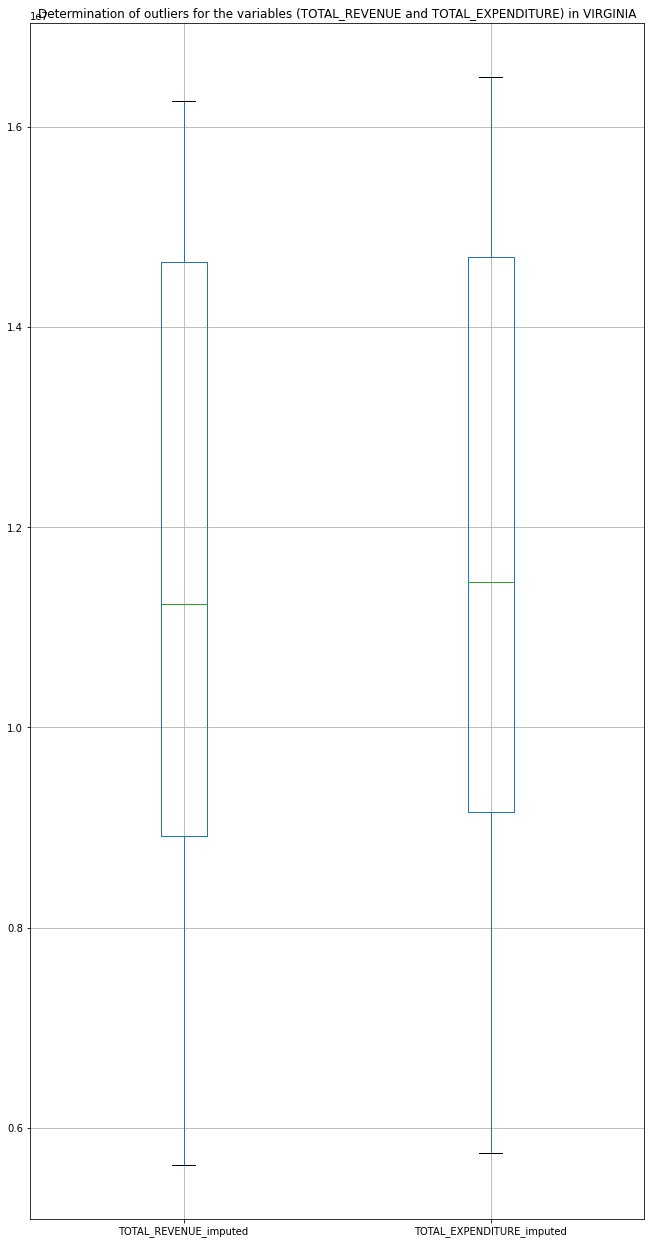

In [14]:
data2.boxplot(column=['TOTAL_REVENUE_imputed', 'TOTAL_EXPENDITURE_imputed'], figsize=(11,22))
title_boxplot = 'Determination of outliers for the variables (TOTAL_REVENUE and TOTAL_EXPENDITURE) in VIRGINIA'
plt.title( title_boxplot )
plt.suptitle('') # that's what you're after
plt.show()

In [15]:
from scipy.stats import zscore
zscores = zscore(data2["TOTAL_EXPENDITURE_imputed"])
for i in range(1,5):
    print("The score threshold is: {}".format(i))
    print("The indices of the outliers of TOTAL_EXPENDITURE_imputed:")
    print(np.where(zscores > i))
    print("Number of outliers is: {}".format(len((np.where(zscores > i)[0]))))
    print('--'*40)
    
print("x-x-"*29)

from scipy.stats import zscore
zscores = zscore(data2["TOTAL_REVENUE_imputed"])
for i in range(1,5):
    print("The score threshold is: {}".format(i))
    print("The indices of the outliers of TOTAL_REVENUE_imputed:")
    print(np.where(zscores > i))
    print("Number of outliers is: {}".format(len((np.where(zscores > i)[0]))))
    print('--'*40)

The score threshold is: 1
The indices of the outliers of TOTAL_EXPENDITURE_imputed:
(array([16, 17, 18, 20, 21, 22, 23, 24], dtype=int64),)
Number of outliers is: 8
--------------------------------------------------------------------------------
The score threshold is: 2
The indices of the outliers of TOTAL_EXPENDITURE_imputed:
(array([], dtype=int64),)
Number of outliers is: 0
--------------------------------------------------------------------------------
The score threshold is: 3
The indices of the outliers of TOTAL_EXPENDITURE_imputed:
(array([], dtype=int64),)
Number of outliers is: 0
--------------------------------------------------------------------------------
The score threshold is: 4
The indices of the outliers of TOTAL_EXPENDITURE_imputed:
(array([], dtype=int64),)
Number of outliers is: 0
--------------------------------------------------------------------------------
x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-x-

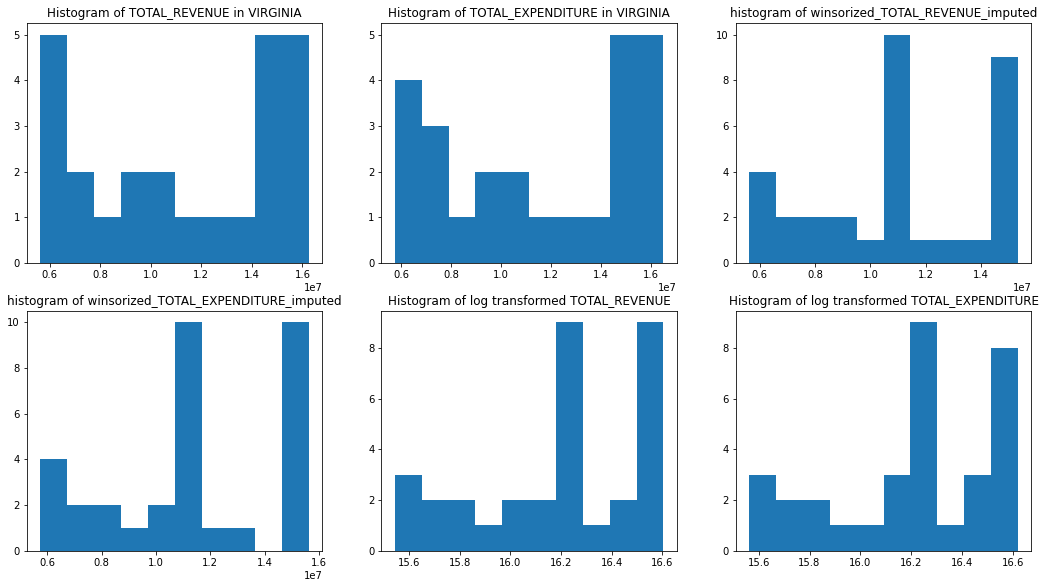

In [16]:

data2["winsorize_TOTAL_REVENUE_imputed"] = winsorize(data2["TOTAL_REVENUE_imputed"], (0, 0.10))
data2["winsorize_TOTAL_EXPENDITURE_imputed"] = winsorize(data2["TOTAL_EXPENDITURE_imputed"], (0, 0.10))
data2["log_TOTAL_REVENUE_imputed"] = np.log(data2["TOTAL_REVENUE_imputed"])
data2["log_TOTAL_EXPENDITURE_imputed"] = np.log(data2["TOTAL_EXPENDITURE_imputed"])


plt.figure(figsize=(18,15))

plt.subplot(3, 3, 1)
plt.hist(data1["TOTAL_REVENUE"])
plt.title("Histogram of TOTAL_REVENUE in VIRGINIA")

plt.subplot(3, 3, 2)
plt.hist(data1["TOTAL_EXPENDITURE"])
plt.title("Histogram of TOTAL_EXPENDITURE in VIRGINIA")


plt.subplot(3, 3, 3)
plt.hist(data2["winsorize_TOTAL_REVENUE_imputed"])
plt.title("histogram of winsorized_TOTAL_REVENUE_imputed")

plt.subplot(3, 3, 4)
plt.hist(data2["winsorize_TOTAL_EXPENDITURE_imputed"])
plt.title("histogram of winsorized_TOTAL_EXPENDITURE_imputed")


# Histograms of the log-transformed data
plt.subplot(3, 3, 5)
plt.hist(data2["log_TOTAL_REVENUE_imputed"])
plt.title("Histogram of log transformed TOTAL_REVENUE")

plt.subplot(3, 3, 6)
plt.hist(data2["log_TOTAL_EXPENDITURE_imputed"])
plt.title("Histogram of log transformed TOTAL_EXPENDITURE")


plt.show()


Questions is: In the chosen state, in which of the lessons are the students more successful—math or reading?
What are the distributions of the math and reading scores in the sample?


In [17]:
VIRGINIA_R_E.describe()

,YEAR,TOTAL_REVENUE,TOTAL_EXPENDITURE,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,TOTAL_REVENUE_imputed,TOTAL_EXPENDITURE_imputed
count,33.000000,2.500000e+01,2.500000e+01,11.000000,12.000000,13.000000,11.000000,3.300000e+01,3.300000e+01
mean,2002.030303,1.123728e+07,1.145636e+07,240.909091,282.416667,224.230769,266.909091,1.123728e+07,1.145636e+07
std,9.722670,3.753952e+06,3.806458e+06,8.372031,8.701707,4.763644,1.868397,3.251018e+06,3.296489e+06
min,1986.000000,5.631293e+06,5.744469e+06,221.000000,264.000000,213.000000,262.000000,5.631293e+06,5.744469e+06
25%,1994.000000,7.723744e+06,7.813707e+06,239.500000,280.250000,223.000000,266.500000,8.911426e+06,9.154676e+06
50%,2002.000000,1.115117e+07,1.140406e+07,244.000000,286.500000,226.000000,267.000000,1.123728e+07,1.145636e+07
75%,2010.000000,1.493720e+07,1.512946e+07,246.500000,288.000000,227.000000,268.000000,1.465534e+07,1.470085e+07
max,2019.000000,1.625927e+07,1.649752e+07,248.000000,290.000000,229.000000,269.000000,1.625927e+07,1.649752e+07


# Before Imputation with Mean, Median, Mode and Interpolation of the data, it is clearly seen that there are a few of outliers present in the lower bound of the Reading and Math scores for Virginia.

It is observed that the math minimum scores for AVG_MATH_4_SCORE and AVG_MATH_8_SCORE are 221 and 264, respectively; whereas, their maximum scores are 248 and 290. For the reading min scores for AVG_READING_4_SCORE and AVG_READING_8_SCORE are 213 and 269 and for their max scores are 229 and 269, respectively. Thus, it is determined that the gap between the max and min of the math scores have lesser difference than that of the readings. Hence, the Match scores, collectively, considered to be better than Reading in VIRGINIA.



<AxesSubplot:>

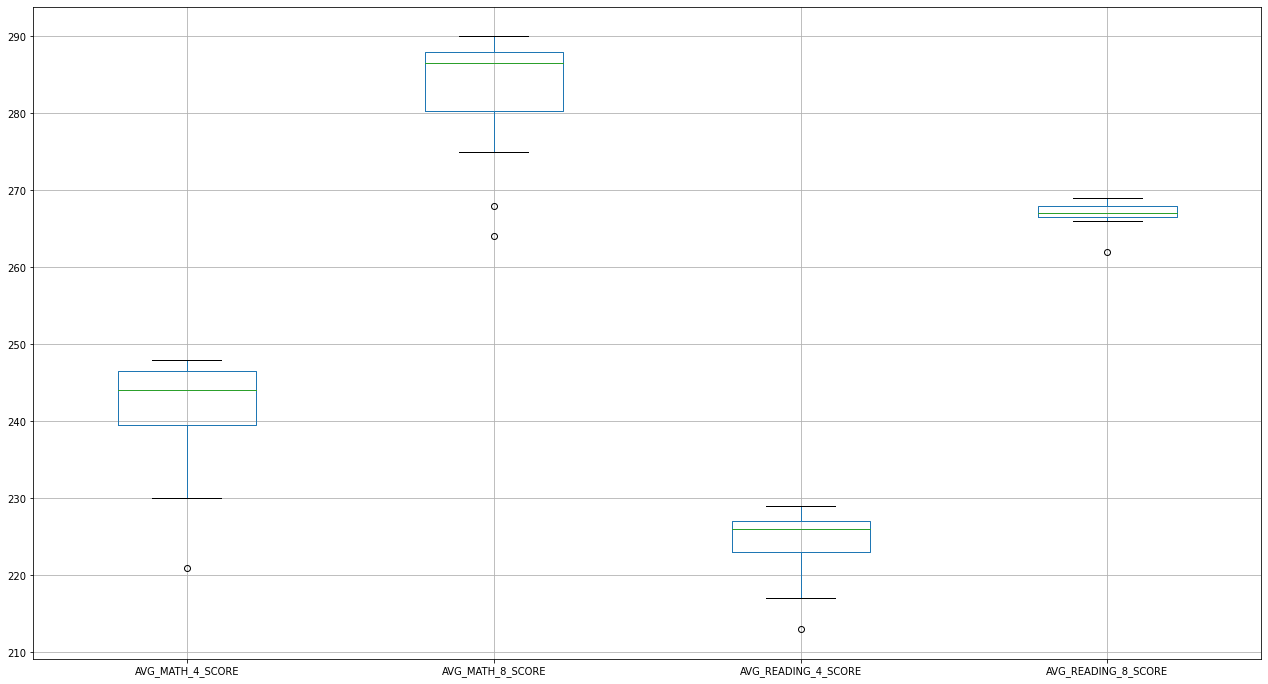

In [18]:
VIRGINIA_R_E.boxplot(column=['AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE', 'AVG_READING_4_SCORE','AVG_READING_8_SCORE'],figsize=(22,12))

Now, look again at the original dataset (before you filled in the missing values). Notice there are too many missing values for math and reading scores. Fill out the missing values using mean, median, and linear interpolation. Then, compare the effects of these techniques on the distributions of the score variables.


# In order to determine the Mean, Median, Mode and interpolated data for missing values for the Match and Reading scores columns, I used the dataframe, Revenue_Expenditure_State to create the new imputed columns to compare and contrast which method is the best for Univariant variables. 

# Handling Missing values in Reading and Match Scores With MEAN, MEDIAN, MODE and LINEAR-INTERPOLATION. 

In [19]:
data3= Revenue_Expenditure_State.copy()
data3["AVG_MATH_4_SCORE_mean"]=data3["AVG_MATH_4_SCORE"].fillna(data3['AVG_MATH_4_SCORE'].mean())
data3["AVG_MATH_8_SCORE_mean"]=data3["AVG_MATH_8_SCORE"].fillna(data3["AVG_MATH_8_SCORE"].mean())
data3["AVG_READING_4_SCORE_mean"]=data3["AVG_READING_4_SCORE"].fillna(data3['AVG_READING_4_SCORE'].mean())
data3["AVG_READING_8_SCORE_mean"]=data3["AVG_READING_8_SCORE"].fillna(data3["AVG_READING_8_SCORE"].mean())


data3["AVG_MATH_4_SCORE_median"]=data3["AVG_MATH_4_SCORE"].fillna(data3['AVG_MATH_4_SCORE'].median())
data3["AVG_MATH_8_SCORE_median"]=data3["AVG_MATH_8_SCORE"].fillna(data3["AVG_MATH_8_SCORE"].median())
data3["AVG_READING_4_SCORE_median"]=data3["AVG_READING_4_SCORE"].fillna(data3['AVG_READING_4_SCORE'].median())
data3["AVG_READING_8_SCORE_median"]=data3["AVG_READING_8_SCORE"].fillna(data3["AVG_READING_8_SCORE"].median())


data3["AVG_MATH_4_SCORE_mode"]=data3["AVG_MATH_4_SCORE"].fillna(data3['AVG_MATH_4_SCORE'].mode())
data3["AVG_MATH_8_SCORE_mode"]=data3["AVG_MATH_8_SCORE"].fillna(data3["AVG_MATH_8_SCORE"].mode())
data3["AVG_READING_4_SCORE_mode"]=data3["AVG_READING_4_SCORE"].fillna(data3['AVG_READING_4_SCORE'].mode())
data3["AVG_READING_8_SCORE_mode"]=data3["AVG_READING_8_SCORE"].fillna(data3["AVG_READING_8_SCORE"].mode())


In [20]:
int_linear_read4 =data3.AVG_READING_4_SCORE.interpolate(method='linear', limit_direction='forward', axis=0)
int_linear_read8 =data3.AVG_READING_8_SCORE.interpolate(method='linear', limit_direction='backward', axis=0)
int_linear_math4 =data3.AVG_MATH_4_SCORE.interpolate(method='linear', limit_direction='forward', axis=0)
int_linear_math8 =data3.AVG_MATH_8_SCORE.interpolate(method='linear', limit_direction='forward', axis=0)

# Using the variables' list as the new individual column for the interpolated data for reading and match scores

data3['Int_READING_4_SCORE'] = int_linear_read4
data3['Int_READING_8_SCORE'] = int_linear_read8

data3['Int_MATH_4_SCORE'] = int_linear_math4
data3['Int_MATH_8_SCORE'] = int_linear_math8


data3.isnull().sum()

STATE                            0
YEAR                             0
TOTAL_REVENUE                  440
TOTAL_EXPENDITURE              440
AVG_MATH_4_SCORE              1150
AVG_MATH_8_SCORE              1113
AVG_READING_4_SCORE           1065
AVG_READING_8_SCORE           1153
AVG_MATH_4_SCORE_mean            0
AVG_MATH_8_SCORE_mean            0
AVG_READING_4_SCORE_mean         0
AVG_READING_8_SCORE_mean         0
AVG_MATH_4_SCORE_median          0
AVG_MATH_8_SCORE_median          0
AVG_READING_4_SCORE_median       0
AVG_READING_8_SCORE_median       0
AVG_MATH_4_SCORE_mode         1150
AVG_MATH_8_SCORE_mode         1113
AVG_READING_4_SCORE_mode      1065
AVG_READING_8_SCORE_mode      1152
Int_READING_4_SCORE              0
Int_READING_8_SCORE              0
Int_MATH_4_SCORE                 0
Int_MATH_8_SCORE                 0
dtype: int64

In [21]:
VIRGINIA_Read_Math = data3[data3['STATE']=='VIRGINIA']
VIRGINIA_Read_Math.set_index('STATE', inplace=True)
VIRGINIA_Read_Math

,YEAR,TOTAL_REVENUE,TOTAL_EXPENDITURE,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,AVG_MATH_4_SCORE_mean,AVG_MATH_8_SCORE_mean,AVG_READING_4_SCORE_mean,...,AVG_READING_4_SCORE_median,AVG_READING_8_SCORE_median,AVG_MATH_4_SCORE_mode,AVG_MATH_8_SCORE_mode,AVG_READING_4_SCORE_mode,AVG_READING_8_SCORE_mode,Int_READING_4_SCORE,Int_READING_8_SCORE,Int_MATH_4_SCORE,Int_MATH_8_SCORE
STATE,,,,,,,,,,,,,,,,,,,,,
VIRGINIA,1992,5631293.0,5744469.0,221.0,268.0,221.0,NaN,221.000000,268.000000,221.000000,...,221.0,265.0,221.0,268.0,221.0,NaN,221.000000,255.000000,221.000000,268.000000
VIRGINIA,1993,5918536.0,5955333.0,NaN,NaN,NaN,NaN,236.327434,278.280731,218.806154,...,220.0,265.0,NaN,NaN,NaN,NaN,209.442308,255.000000,223.949721,273.555866
VIRGINIA,1994,6125739.0,6276362.0,NaN,NaN,213.0,NaN,236.327434,278.280731,213.000000,...,213.0,265.0,NaN,NaN,213.0,NaN,213.000000,255.000000,222.810056,271.988827
VIRGINIA,1995,6354418.0,6590998.0,NaN,NaN,NaN,NaN,236.327434,278.280731,218.806154,...,220.0,265.0,NaN,NaN,NaN,NaN,217.948052,255.000000,221.670391,270.421788
VIRGINIA,1996,6674519.0,6903384.0,NaN,NaN,NaN,NaN,236.327434,278.280731,218.806154,...,220.0,265.0,NaN,NaN,NaN,NaN,214.636364,255.000000,220.530726,268.854749
VIRGINIA,1997,7345090.0,7436340.0,NaN,NaN,NaN,NaN,236.327434,278.280731,218.806154,...,220.0,265.0,NaN,NaN,NaN,NaN,211.324675,255.000000,219.391061,267.287709
VIRGINIA,1998,7723744.0,7813707.0,NaN,NaN,217.0,266.0,236.327434,278.280731,217.000000,...,217.0,266.0,NaN,NaN,217.0,266.0,217.000000,266.000000,218.251397,265.720670
VIRGINIA,1999,8331336.0,8335873.0,NaN,NaN,NaN,NaN,236.327434,278.280731,218.806154,...,220.0,265.0,NaN,NaN,NaN,NaN,214.642857,259.948052,217.111732,264.153631
VIRGINIA,2000,8911426.0,9154676.0,230.0,275.0,NaN,NaN,230.000000,275.000000,218.806154,...,220.0,265.0,230.0,275.0,NaN,NaN,211.000000,256.636364,230.000000,275.000000


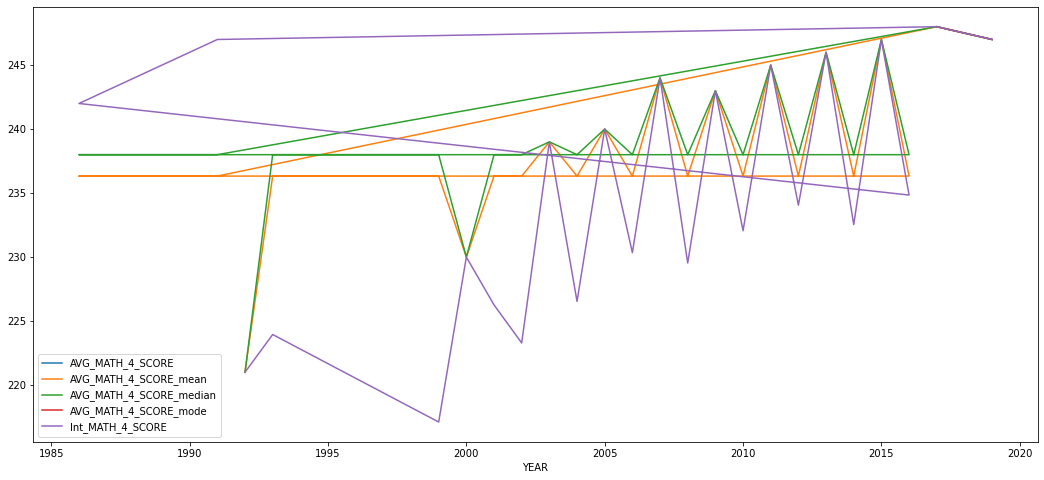

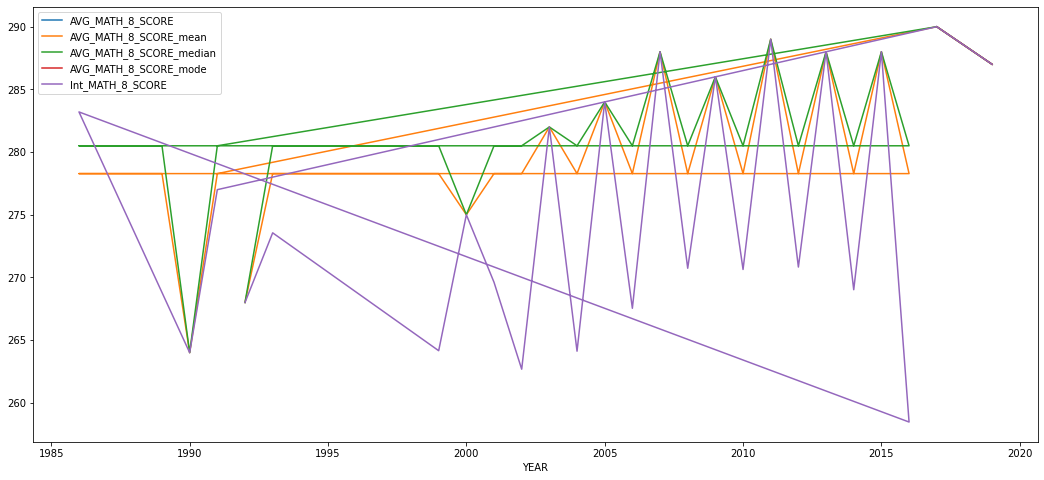

In [22]:
MATH_4_SCORE = VIRGINIA_Read_Math.filter(items=['YEAR','AVG_MATH_4_SCORE', 'AVG_MATH_4_SCORE_mean','AVG_MATH_4_SCORE_median','AVG_MATH_4_SCORE_mode', 'Int_MATH_4_SCORE'])
MATH_4_SCORE.set_index('YEAR', inplace=True)

lines = MATH_4_SCORE.plot.line(figsize=(18,8))

MATH_8_SCORE = VIRGINIA_Read_Math.filter(items=['YEAR','AVG_MATH_8_SCORE', 'AVG_MATH_8_SCORE_mean','AVG_MATH_8_SCORE_median','AVG_MATH_8_SCORE_mode', 'Int_MATH_8_SCORE'])
MATH_8_SCORE.set_index('YEAR', inplace=True)

lines = MATH_8_SCORE.plot.line(figsize=(18,8))

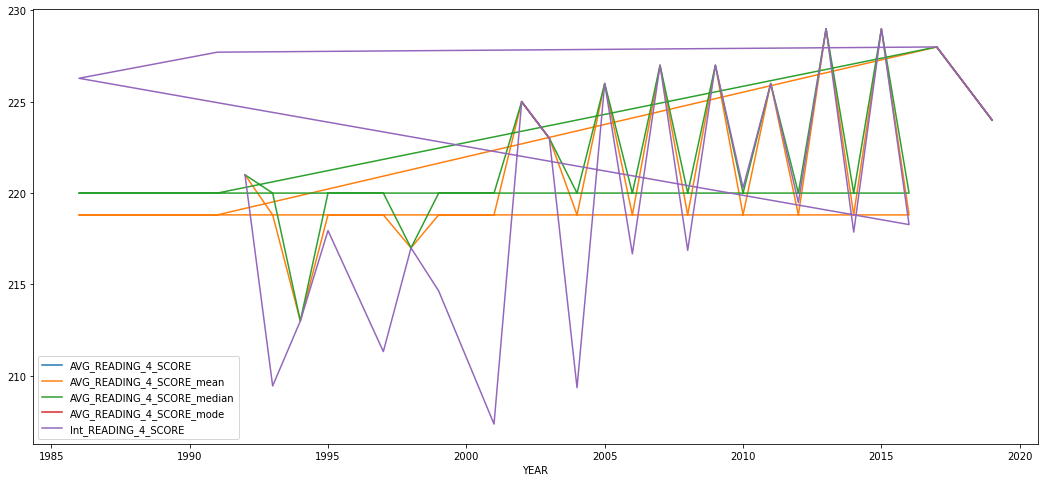

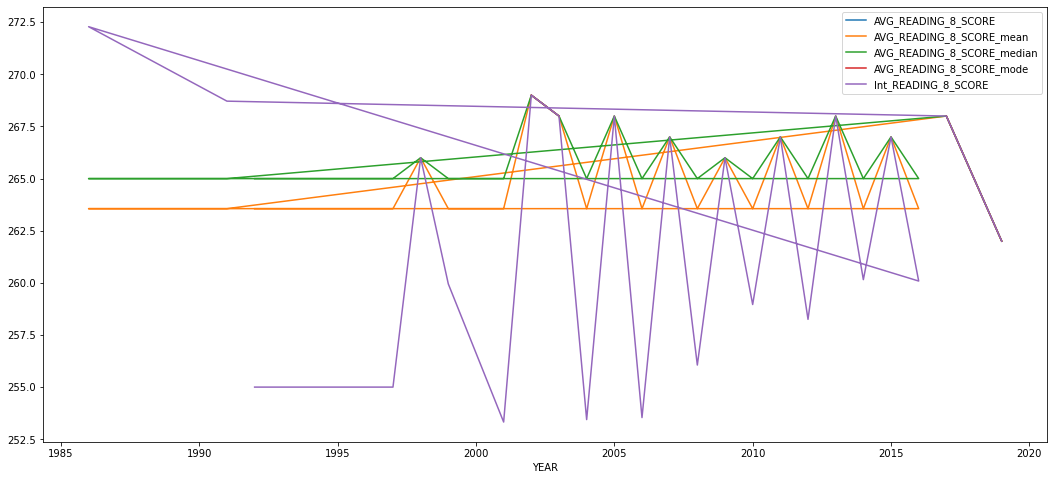

In [23]:

READING_4_SCORE = VIRGINIA_Read_Math.filter(items=['YEAR','AVG_READING_4_SCORE', 'AVG_READING_4_SCORE_mean','AVG_READING_4_SCORE_median','AVG_READING_4_SCORE_mode', 'Int_READING_4_SCORE'])
READING_4_SCORE.set_index('YEAR', inplace=True)

lines = READING_4_SCORE.plot.line(figsize=(18,8))


READING_8_SCORE = VIRGINIA_Read_Math.filter(items=['YEAR','AVG_READING_8_SCORE', 'AVG_READING_8_SCORE_mean','AVG_READING_8_SCORE_median','AVG_READING_8_SCORE_mode', 'Int_READING_8_SCORE'])
READING_8_SCORE.set_index('YEAR', inplace=True)

lines = READING_8_SCORE.plot.line(figsize=(18,8))

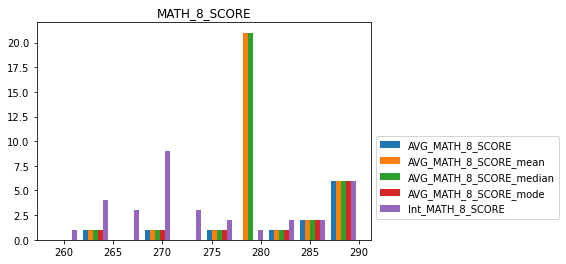

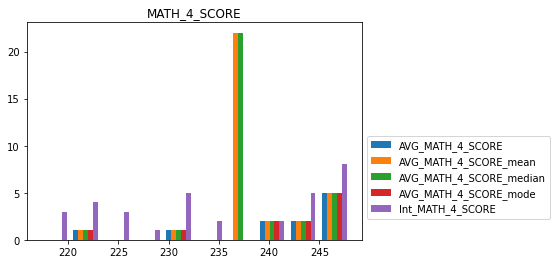

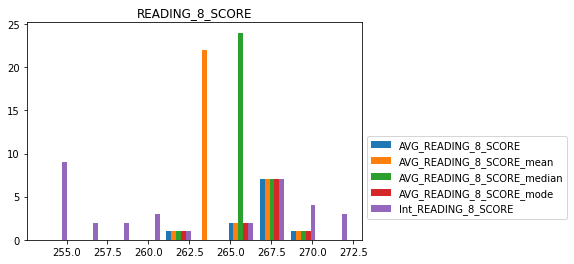

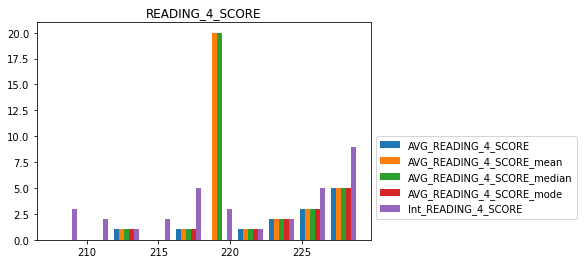

In [24]:
plt.hist(MATH_8_SCORE)
plt.title("MATH_8_SCORE")
#add legend to bar chart
plt.legend(['AVG_MATH_8_SCORE', 'AVG_MATH_8_SCORE_mean','AVG_MATH_8_SCORE_median','AVG_MATH_8_SCORE_mode', 'Int_MATH_8_SCORE'], prop={'size': 10}, bbox_to_anchor=(1.0, 0.5))
plt.show()

plt.hist(MATH_4_SCORE)
plt.title("MATH_4_SCORE")
#add legend to bar chart
plt.legend(['AVG_MATH_4_SCORE', 'AVG_MATH_4_SCORE_mean','AVG_MATH_4_SCORE_median','AVG_MATH_4_SCORE_mode', 'Int_MATH_4_SCORE'], prop={'size': 10}, bbox_to_anchor=(1.0, 0.5) )
plt.show()

plt.hist(READING_8_SCORE)
plt.title("READING_8_SCORE")
#add legend to bar chart
plt.legend(['AVG_READING_8_SCORE', 'AVG_READING_8_SCORE_mean','AVG_READING_8_SCORE_median','AVG_READING_8_SCORE_mode', 'Int_READING_8_SCORE'], prop={'size': 10}, bbox_to_anchor=(1.0, 0.5))
plt.show()

plt.hist(READING_4_SCORE)
plt.title("READING_4_SCORE")
#add legend to bar chart
plt.legend(['AVG_READING_4_SCORE', 'AVG_READING_4_SCORE_mean','AVG_READING_4_SCORE_median','AVG_READING_4_SCORE_mode', 'Int_READING_4_SCORE'], prop={'size': 10}, bbox_to_anchor=(1.0, 0.5))
plt.show()

# https://www.statology.org/pandas-plot-legend/
# https://stackoverflow.com/questions/23556153/how-to-put-legend-outside-the-plot-with-pandas

In [25]:
 print("To conclude, in order to solve the univariant variables' missing values and outliers' problems in the data for the Reading and Math scores in VIRGINIA, it is determined that the Mean imputation is much better as compared to other methods.\n Median, however, is skewing the imputed data points to right, as shown in the histograms.")

To conclude, in order to solve the univariant variables' missing values and outliers' problems in the data for the Reading and Math scores in VIRGINIA, it is determined that the Mean imputation is much better as compared to other methods.
 Median, however, is skewing the imputed data points to right, as shown in the histograms.
